In [249]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.util as util
import skimage.io as io
import os as os
from skimage.metrics import peak_signal_noise_ratio,structural_similarity
from sklearn.metrics import mean_squared_error
import collections

In [334]:
def vector_median_filter(image,size):
    x_index=2*size+1
    y_index=2*size+1
    row=len(image)
    column=len(image[0])
    
    
    red=image[:,:,0]
    green=image[:,:,1]
    blue=image[:,:,2]
    
    for x in range (0,row):
        y_index=2*size+1
        for y in range(0,column):
            
#             red=image[x:x_index,y:y_index,0]
#             green=image[x:x_index,y:y_index,1]
#             blue=image[x:x_index,y:y_index,2]
            if(x>len(red) - 3 ) :
                break
            if(y>len(green[0])- 3):
                break
            rf=red[x:x_index,y:y_index]
            gf=green[x:x_index,y:y_index]
            bf=blue[x:x_index,y:y_index]
            red_sorted=np.sort(rf.flatten(),axis=0)
            green_sorted=np.sort(gf.flatten(),axis=0)
            blue_sorted=np.sort(bf.flatten(),axis=0)
            r=red_sorted[len(red_sorted)//2]
            g=green_sorted[len(green_sorted)//2]
            b=blue_sorted[len(blue_sorted)//2]
            rgb=np.array([r,g,b])
            cccc=np.array([rf,gf,bf])
            msr_r_org=np.square(np.subtract(cccc,image[x][y]))
            
            msr_r_fil=np.square(np.subtract(cccc,rgb))
#             print(msr_r_org.mean())
#             print(msr_r_fil.mean())
#             print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
            if(msr_r_org[1].all()>msr_r_fil[1].all()):
                image[x][y]=rgb
            
            #image[x][y]=rgb
            y_index=y_index+1
        x_index=x_index+1
    return image


def PSNR_SSIM():
    noisy_images=[]
    for root, dirs, files in os.walk('asn1-files/images/noisy-test'):
        for filename in files:
            noisy_images.append(os.path.join(root, filename))
            if filename == '.DS_Store':   
                continue
                
    noiseless_images=[]
    for root, dirs, files in os.walk('asn1-files/images/noisles_test'):
        for filename in files:
            noiseless_images.append(os.path.join(root, filename))
            if filename == '.DS_Store':   
                continue
    
    psnr_noiseless_vs_noisy=[]
    psnr_noiseless_vs_filterd=[]
    
    ssim_noiseless_vs_noisy=[]
    ssim_noiseless_vs_filterd=[]
    
    for x in range(len(noisy_images)):
        
        image_noisles=io.imread(noiseless_images[x])
        image_noisy=io.imread(noisy_images[x])
        image_noisy_copy=io.imread(noisy_images[x])
        
        psnr_noiseless_vs_noisy.append(peak_signal_noise_ratio(image_noisles, image_noisy))
        psnr_noiseless_vs_filterd.append(peak_signal_noise_ratio(image_noisles,vector_median_filter(image_noisy,1)))
        
        ssim_noiseless_vs_noisy.append(structural_similarity(image_noisles, image_noisy, channel_axis = -1))
        ssim_noiseless_vs_filterd.append(structural_similarity(image_noisles, vector_median_filter(image_noisy,1), channel_axis = -1))
    
    return psnr_noiseless_vs_noisy,psnr_noiseless_vs_filterd,ssim_noiseless_vs_noisy,ssim_noiseless_vs_filterd

    

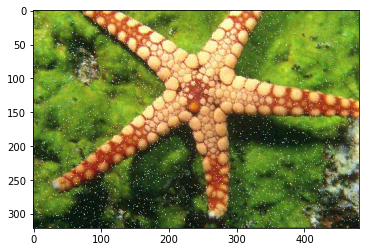

In [335]:
noisy = io.imread("asn1-files/images/noisy/12003.png")
noise_copy=io.imread("asn1-files/images/noisy/12003.png")
noiseless=io.imread("asn1-files/images/noiseless/12003.png")
filterd=vector_median_filter(noisy,1)

plt.imshow(filterd)

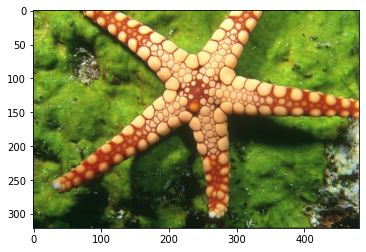

In [328]:
noiselessaa = io.imread("asn1-files/images/noiseless/12003.png")
plt.imshow(noiselessaa)

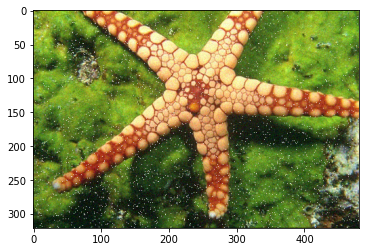

In [329]:
noisy = io.imread("asn1-files/images/noisy/12003.png")
plt.imshow(noisy)

In [330]:
psnr_noisy_vs_noiseless = peak_signal_noise_ratio(noiseless, noise_copy)
print(psnr_noisy_vs_noiseless)

psnr_filterd_vs_noiseless = peak_signal_noise_ratio(noiseless, filterd)
print(psnr_filterd_vs_noiseless)

print("\n \n")

ssim_noisy_vs_noiseless = structural_similarity(noiseless, noise_copy, channel_axis = -1)
print(ssim_noisy_vs_noiseless)

ssim_filterd_vs_noiseless = structural_similarity(noiseless, filterd, channel_axis = -1)
print(ssim_filterd_vs_noiseless)

20.22969850100758
21.60619448306197

 

0.5652462041079802
0.5933852263705178


In [68]:

psnr_org,psnr_fil,ssim_org,ssim_fil=PSNR_SSIM()
psnr_avg_org=sum(psnr_org)/len(psnr_org)
psnr_avg_fil=sum(psnr_fil)/len(psnr_fil)
ssim_avg_org=sum(ssim_org)/len(ssim_org)
ssim_avg_fil=sum(ssim_fil)/len(ssim_fil)

print(psnr_avg_org)
print(psnr_avg_fil)
print(ssim_avg_org)
print(ssim_avg_fil)

20.27216753581746
23.277616005027
0.5876919073218346
0.46045245262973955


([<matplotlib.axis.XTick at 0x7fb7f5226860>,
 [Text(0.5, 0, 'Noisy PSNR'), Text(1.5, 0, 'Denoised PSNR')])

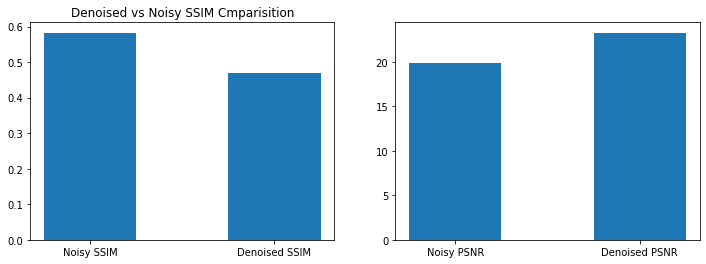

In [53]:
plt.subplots(1,2,figsize=(12,4))
position=[0.5,1.5]
averages1=[psnr_avg_org,psnr_avg_fil]
averages2=[ssim_avg_org,ssim_avg_fil]

plt.subplot(1,2,1)
plt.bar(position,averages2,width=0.5)
plt.xticks(position, ('Noisy SSIM', 'Denoised SSIM'))
plt.title('Denoised vs Noisy SSIM Cmparisition')

plt.subplot(1,2,2)
plt.bar(position,averages1,width=0.5)
plt.xticks(position, ('Noisy PSNR', 'Denoised PSNR'))